### 청와대 국민청원 데이터에서 각 분류별 Top1 추출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")
import datetime as dt
### 세종사전 실행
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
twitter = Twitter()

In [2]:
df = pd.read_excel("test/test_문화.xlsx")
df
# df.Date = pd.to_datetime(df.Date)

,Date,Title
0,2018-04-13,전명규 빙상연맹 부회장 사퇴했지만 또 '수렴청정'?
1,2018-04-12,숱한 빙상 의혹들 제대로 밝혀낼까
2,2018-04-12,빙상계에 드리워진 '전명규 그림자' 사실상 수렴청정
3,2018-04-12,'메달 제조기' 전명규 빙상경기聯 부회장 사퇴
4,2018-04-12,‘노선영 왕따’ 논란 전명규 빙상연맹 부회장 사임
...,...,...
12143,2018-01-19,청와대 국민소통 광장 국민청원
12144,2018-01-19,국민청원에 동참 부탁 드립니다 며칠동안 뜬눈으로 밤을 지새워가며 문지지자들이 댓글...
12145,2018-01-19,국민청원 우리나라가 에너지빈곤국으로 전락하지 않도록 탈원전정책을 재검토해 주시기...
12146,2018-01-19,이젠 대놓고 일반국민들이 모아둔 국민연금 털라고 궁리한게 저것이네 국민청원에서 공무...


## 키워드 변경 함수

In [3]:
def rep_keyword(before, after):
    ind = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].index
    df.iloc[ind,1] = df.loc[df['Title'].str.contains(before)].loc[:,"Title"].str.replace(before,after,case = False)

In [4]:
rep_keyword("n번방","엔번방")
rep_keyword("N번방","엔번방")

In [5]:
from string import punctuation
df2 = list(df.Title)

In [6]:
def strip_punc(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in df2:
    clean_df = strip_punc(sent)
    clean_title.append(clean_df)

clean_title[0:3]

['전명규 빙상연맹 부회장 사퇴했지만 또 수렴청정',
 '숱한 빙상 의혹들 제대로 밝혀낼까',
 '빙상계에 드리워진 전명규 그림자 사실상 수렴청정']

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()
import re
import time
import datetime
start = time.time()

dataset = []
for i in range(len(clean_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))
    
sec = time.time() - start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:04:48


In [8]:
from gensim import corpora, models
import gensim

In [9]:
high_score_reviews = dataset

In [10]:
high_score_reviews = [[y for y in x if not len(y)==1]
                     for x in high_score_reviews]
diction = corpora.Dictionary(high_score_reviews)
corpus = [diction.doc2bow(text) for text in high_score_reviews]


In [11]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= i, id2word= diction)
    coherence_model_lda = CoherenceModel(model = ldamodel, texts = high_score_reviews, dictionary = diction,
                                        topn = 10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


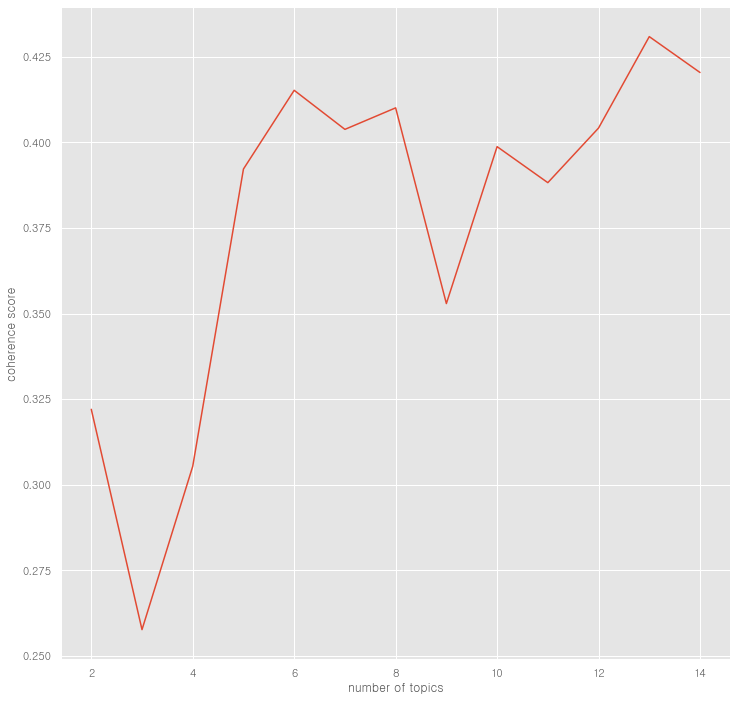

In [12]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [13]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2, 20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= i, id2word= diction)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

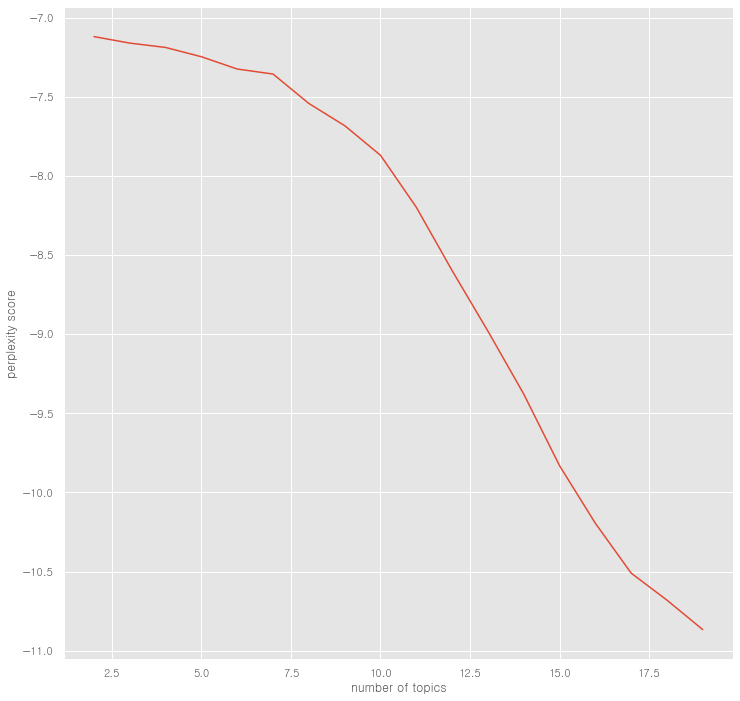

In [14]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [27]:
## 토픽 개수 7개 아니면 11개가 적당할거 같다.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= 8, alpha = 0.1, id2word= diction)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
ldamodel.print_topics(num_words = 20)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.120*"경원" + 0.038*"위원직" + 0.037*"청원" + 0.036*"국민" + 0.017*"조직" + 0.013*"국민청원" + 0.012*"처벌국민청원" + 0.011*"올림픽" + 0.010*"위원" + 0.010*"정의" + 0.010*"처벌" + 0.010*"상조" + 0.009*"김상조" + 0.008*"기세" + 0.007*"민주화" + 0.007*"경제민주화" + 0.006*"평창올림픽" + 0.006*"주세" + 0.006*"지지자" + 0.006*"국민청원봇물"'),
 (1,
  '0.094*"청원" + 0.093*"국민" + 0.078*"청와대" + 0.076*"국민청원" + 0.048*"소통" + 0.047*"광장" + 0.043*"국민소통" + 0.014*"민국" + 0.014*"대한" + 0.014*"대한민국" + 0.013*"최저" + 0.012*"시급" + 0.012*"김보름" + 0.011*"자격" + 0.011*"보름" + 0.011*"국회의원" + 0.010*"자격박탈" + 0.010*"최저시급" + 0.009*"홈페이지" + 0.009*"우의"'),
 (2,
  '0.045*"국민" + 0.044*"청원" + 0.037*"올림픽" + 0.024*"평창올림픽" + 0.021*"국민청원" + 0.017*"의원" + 0.012*"재인" + 0.012*"문재인" + 0.011*"여자" + 0.011*"단일팀" + 0.011*"청와대" + 0.011*"자유" + 0.010*"형식" + 0.009*"우리" + 0.009*"정부" + 0.009*"나라" + 0.008*"제안" + 0.008*"우리나라" + 0.008*"발언" + 0.007*"남북"'),
 (3,
  '0.072*"강제" + 0.045*"청원" + 0.042*"처벌법" + 0.042*"국민" + 0.042*"종처벌법" + 0.039*"증발" + 0.038*"궁색" + 0.026*"목사" + 0.021*"종목사" + 0.020*"국민청원" + 0

In [25]:
import pyLDAvis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from gensim.models import LdaModel # To use the LDA model

import pyLDAvis.gensim # To visualise LDA model effectively

import pandas as pd


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, diction)
vis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.070373 -0.057888       1        1  18.870923
1     -0.128983 -0.085971       2        1  18.338746
7     -0.063213 -0.005651       3        1  15.667516
4     -0.048713 -0.031861       4        1  12.415641
6     -0.071210 -0.013830       5        1  11.134835
2      0.115291 -0.059857       6        1  10.508728
3      0.005065  0.303479       7        1   8.237496
0      0.262135 -0.048421       8        1   4.826115, topic_info=       Term         Freq        Total Category  logprob  loglift
267      경원   917.000000   917.000000  Default  30.0000  30.0000
126      강제  1001.000000  1001.000000  Default  29.0000  29.0000
696      소통  1400.000000  1400.000000  Default  28.0000  28.0000
1078     광장  1355.000000  1355.000000  Default  27.0000  27.0000
1079   국민소통  1229.000000  1229.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1103     처벌    76.072723  1774.087150   Topic8  -4.5940  -0.1182
84    평창올림픽    47.214959   450.498920   Topic8  -5.0709   0.7755
1354     주세    45.585722   488.890301   Topic8  -5.1061   0.6586
1115     반대    39.546277   319.771514   Topic8  -5.2482   0.9410
680      만명    36.534888  1912.125138   Topic8  -5.3274  -0.9266

[477 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3161      1  0.993209   가난
339       1  0.045110   가능
339       2  0.894678   가능
339       4  0.007518   가능
339       7  0.045110   가능
...     ...       ...  ...
85        2  0.010733   회견
85        4  0.010733   회견
85        7  0.955200   회견
1635      5  0.979420   회피
6645      5  0.961862   횡단

[961 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 8, 5, 7, 3, 4, 1])

In [30]:
kk = ldamodel.show_topic(1,topn = 80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2
#kk2.to_csv("test0911_1.csv",encoding = "cp949", index = False)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1
0,청원,0.094069
1,국민,0.093224
2,청와대,0.077773
3,국민청원,0.075777
4,소통,0.048346
...,...,...
13066,치상,0.000005
13067,조롱글,0.000005
13068,거사,0.000005
13069,명진스님,0.000005


In [31]:
def make_topictable_per_doc(ldamodel,corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x: (x[1]), reverse = True)
        
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),
                                                ignore_index= True)
            else:
                break
                    
    return(topic_table)

                

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
topictable = make_topictable_per_doc(ldamodel,corpus)
topictable = topictable.reset_index()
topictable.columns = ["문서 번호", "가장 비중이 높은 토픽", "가장 높은 토픽의 비중", "각 토픽의 비중"]
topictable["문서 내용"] = df.Title
topictable = topictable.loc[:,["문서 번호", "문서 내용", "가장 비중이 높은 토픽", "가장 높은 토픽의 비중", "각 토픽의 비중"]]
topictable[:10]

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,문서 내용,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,전명규 빙상연맹 부회장 사퇴했지만 또 '수렴청정'?,4.0,0.5298,"[(0, 0.23276542), (2, 0.18954897), (4, 0.52978..."
1,1,숱한 빙상 의혹들 제대로 밝혀낼까,2.0,0.5649,"[(0, 0.02631929), (1, 0.026319375), (2, 0.5648..."
2,2,빙상계에 드리워진 '전명규 그림자' 사실상 수렴청정,0.0,0.5567,"[(0, 0.5566512), (1, 0.012098386), (2, 0.01210..."
3,3,'메달 제조기' 전명규 빙상경기聯 부회장 사퇴,2.0,0.9244,"[(0, 0.010804574), (1, 0.010805879), (2, 0.924..."
4,4,‘노선영 왕따’ 논란 전명규 빙상연맹 부회장 사임,4.0,0.7794,"[(4, 0.77940375), (5, 0.16962501)]"
5,5,"'논란의 중심' 전명규 빙상연맹 부회장, 사퇴서 제출",4.0,0.9289,"[(0, 0.010155165), (1, 0.0101535795), (2, 0.01..."
6,6,전명규 빙상연맹 부회장 사퇴,4.0,0.6489,"[(0, 0.012824248), (1, 0.012824209), (2, 0.274..."
7,7,‘적폐 논란’ 전명규 빙상연맹 부회장 사퇴,4.0,0.5406,"[(0, 0.010206896), (1, 0.010207414), (2, 0.163..."
8,8,"빙상연맹 논란 중심 전명규 부회장, 11일 사임서 제출",4.0,0.6747,"[(4, 0.67468715), (5, 0.2695707)]"
9,9,"전명규, 빙상연맹 부회장 결국 사퇴 “모든 보직에서 사임”",2.0,0.7181,"[(2, 0.7181406), (4, 0.2291674)]"


In [22]:
# topictable.to_csv("test0911_2.csv",encoding = "cp949", index = False)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
